In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

### Load the two datasets

In [2]:
f_nspeech = np.load('C:\\Users\\Manit\\Downloads\\ExamPaperonDimensionalityReduction\\Exam Paper on Dimensionality Reduction\\Dataset\MFCC_N.npy')
f_nspeech.shape

(5000, 60)

In [3]:
f_sspeech = np.load('C:\\Users\\Manit\\Downloads\\ExamPaperonDimensionalityReduction\\Exam Paper on Dimensionality Reduction\\Dataset\MFCC_S.npy')
f_sspeech.shape

(5000, 60)

In [4]:
fn = np.array(f_nspeech)
fs = np.array(f_sspeech)
fn.shape ,fs.shape

((5000, 60), (5000, 60))

### Working for centroids and covariance matrix

In [5]:
# Normal speech centroids of each list
mu = np.mean(fn, axis=0)
Cn = (fn-mu).T
# mean of all computed means
Nn = np.mean(mu)
print(' Centroid of Normal Speech Signal = ',Nn)    

 Centroid of Normal Speech Signal =  -0.30615575834834285


In [6]:
# Shouted speech centroids of each list
mu1 = np.mean(fs, axis=0)
Cc = (fs-mu1).T

# mean of all computed mean
Nc = np.mean(mu1)
print(' Centroid of Shouted Speech Signal = ',Nc)


 Centroid of Shouted Speech Signal =  -0.3136984235553016


In [7]:
print('Covariance matrix of Normal speech signal')
Cn = np.cov(Cn)
Cn.shape

Covariance matrix of Normal speech signal


(60, 60)

In [8]:
print('Covariance matrix of Shouted speech signal')
Cc = np.cov(Cc)
Cc.shape

Covariance matrix of Shouted speech signal


(60, 60)

### Optimal direction vector m^ (unit vector) for LDA

In [9]:
mu = mu1 -mu
print(len(mu))

60


In [10]:
Sw = Cc +Cn
print(Sw.shape)

(60, 60)


In [11]:
u = np.linalg.inv(Sw)@mu

In [16]:
np.linalg.norm(u)

10.79259738456911

In [17]:
m = u/np.linalg.norm(u)
print('Direction vector \n\n' ,m)

Direction vector 

 [ 0.05013247  0.02059452  0.01147756  0.00076913 -0.020969   -0.03169092
 -0.02056796 -0.05929642  0.00243547 -0.02406555 -0.06233557 -0.02164728
 -0.03385221 -0.01278151 -0.05648473  0.04961829 -0.08909274  0.03341232
 -0.05157907  0.03478414 -0.00554002 -0.00273071  0.00941994 -0.02006019
 -0.0062669   0.00815022  0.00302164  0.01945601  0.01438128  0.04405062
 -0.00389541 -0.00458378  0.05268316 -0.03480734  0.01620402  0.01436791
  0.00345099 -0.0043939  -0.00400961  0.01123724  0.29476108  0.13029349
  0.06464455 -0.02897804 -0.14512398 -0.21297685 -0.11160177 -0.23896296
 -0.02695199 -0.10490741 -0.32085395 -0.1062125  -0.19659521 -0.11972019
 -0.3170081   0.25783691 -0.49174749  0.13488922 -0.28860523  0.15750495]


### Project the vector data in arrays N and S to generate the respective array of scalars zN and zS.

In [13]:
zN = fn@m # multiplying direction vector to input data
zN

array([-0.0897243 , -0.14824091, -0.21655072, ..., -0.68304663,
       -0.70418034, -0.71242595])

In [14]:
zS = fs@m # multiplying direction vector to input data
zS.shape

(5000,)

### Plot the normalized histograms of zN and zS in two different colors (red and blue). 

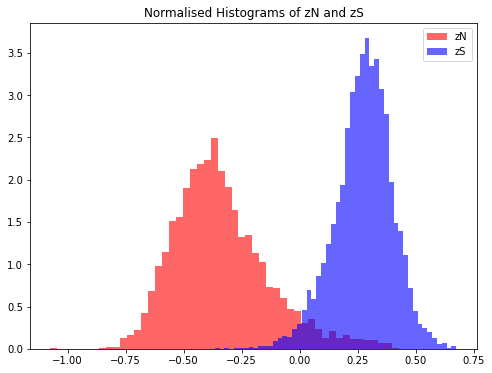

In [20]:
plt.figure(figsize=(8,6))
plt.hist(zN,bins=50, alpha=0.6,color='red',label='zN',density=True)
plt.hist(zS,bins=50, alpha=0.6,color='blue',label='zS',density=True)
plt.title('Normalised Histograms of zN and zS')
plt.legend()
plt.show()